In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

Classification inputs and outputs

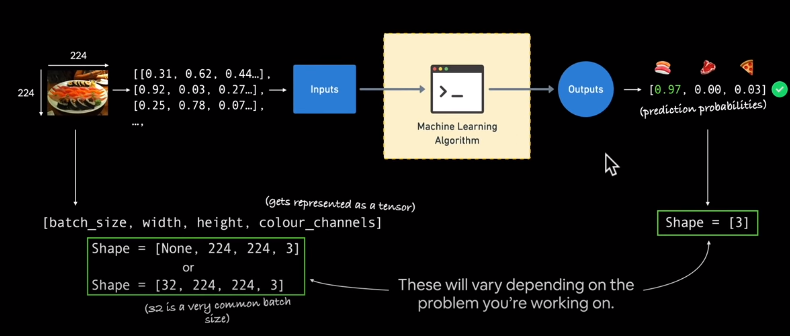

Few types o classfiation problems
1. Binary clasiification
2. Multi class 
3. Multi label

Create data to view and fit 

In [ ]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Visualize data

In [ ]:
import pandas as pd

In [ ]:
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


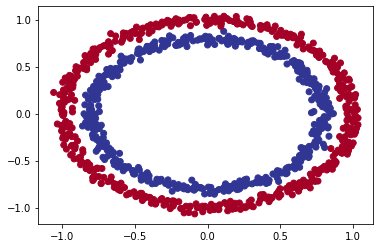

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
np.c_[np.array([1,2,3]).ravel(),np.array([7,8,9]).ravel()]#stacks 2 arrays together

array([[1, 7],
       [2, 8],
       [3, 9]])

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
X,X.shape,X.tolist()

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2),
 [[0.7542462506997276, 0.23148073787097836],
  [-0.7561588822214413, 0.15325887663494678],
  [-0.8153919335251194, 0.17328202920351576],
  [-0.393730728902315, 0.6928827699017868],
  [0.4422076451826442, -0.8967234339920015],
  [-0.4796463680909052, 0.6764347685615512],
  [-0.01364835948765009, 0.8033487191694424],
  [0.771513273784567, 0.14775958770972614],
  [-0.1693223397310359, -0.7934557525393878],
  [-0.12148579609572473, 1.0215090535090692],
  [-0.6424904164605417, -0.5440992919100412],
  [0.5694666038619414, 0.8447677588470263],
  [-0.11773591057994579, 0.83140071355219],
  [0.7341000380997706, -0.33316553284716566],
  [0.6007763329875784, -0.5874263247064434],
  [0.1902257071593219, -0.7634100332379965],
  [-0.9369518458691565, -0.3434314

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)
#set random seed
tf.random.set_seed(42)

#create model
modelCirc=tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])


#compile model
modelCirc.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])


#fit the mode
modelCirc.fit(X,y,epochs=100,verbose=0)

modelCirc.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

doing binary classifcation...


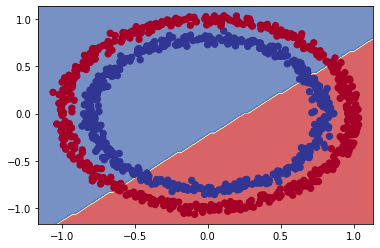

In [ ]:
plot_decision_boundary(modelCirc,X,y)

In above we can see model is trying is learn only linear boundary.Even if data is in circular / non linear format.

We need to add non-linearity into model learning

In [ ]:
#create callback
callback=tf.keras.callbacks.EarlyStopping(patience=1,monitor="loss")
#set random seed
tf.random.set_seed(42)
#create model
modelCirc1=tf.keras.Sequential([
                                tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])

#compile
modelCirc1.compile(loss=tf.keras.losses.binary_crossentropy,
                   optimizer=tf.keras.optimizers.Adam(lr=0.01),
                   metrics=['accuracy'])

history1=modelCirc1.fit(X,y,epochs=200,verbose=0,callbacks=[callback])

modelCirc1.evaluate(X,y)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 1.0000


[0.027195483446121216, 1.0]

doing binary classifcation...


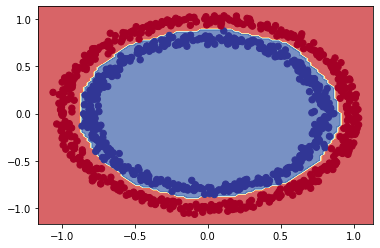

In [ ]:
plot_decision_boundary(modelCirc1,X,y)

Text(0, 0.5, 'loss')

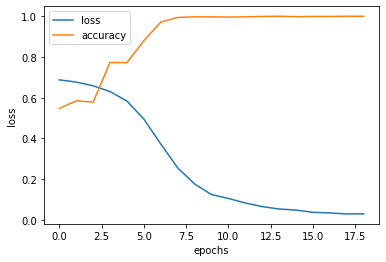

In [ ]:
pd.DataFrame(history1.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


Note

`The combination of linear and non linear lines is one of the key to neaural networks`



Let's add another call back function to determine best learning rate

In [ ]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
callback=tf.keras.callbacks.EarlyStopping(patience=1,monitor="loss")

#set random seed
tf.random.set_seed(42)

#create model
modelCirc2=tf.keras.Sequential([
                                tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile model
modelCirc2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])


#fit the model
history2=modelCirc2.fit(X,y,epochs=200,verbose=0,callbacks=[lr_scheduler,callback])

In [ ]:
modelCirc2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9870


[0.04358961433172226, 0.9869999885559082]

doing binary classifcation...


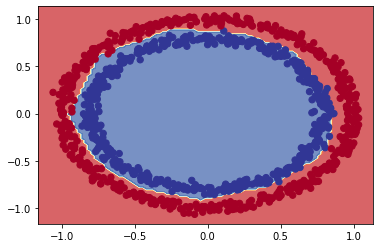

In [ ]:
plot_decision_boundary(modelCirc2,X,y)

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

Text(0, 0.5, 'loss/learning rate')

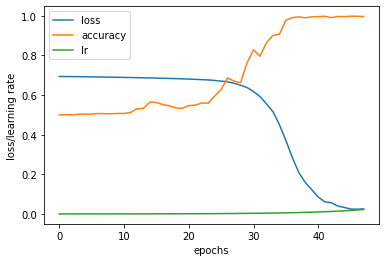

In [ ]:
pd.DataFrame(history2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss/learning rate")

In [ ]:
len(history2.history["loss"])

48

In [ ]:
lrs=1e-4*(10**(tf.range(48)/20))
lrs.shape

TensorShape([48])

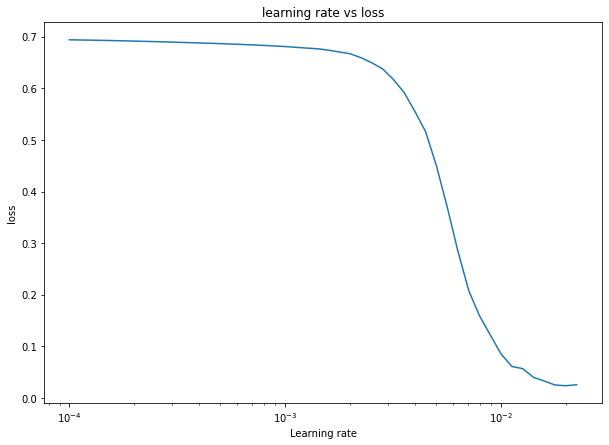

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")
plt.show()

In [ ]:
modelCirc2.predict(X)

array([[8.68065298e-01],
       [9.99737859e-01],
       [9.93221164e-01],
       [9.92759228e-01],
       [1.73926353e-04],
       [9.75021899e-01],
       [9.87375259e-01],
       [9.54452276e-01],
       [9.98601317e-01],
       [2.36004591e-04],
       [9.64416504e-01],
       [1.32104069e-05],
       [9.66526866e-01],
       [9.97468233e-01],
       [6.79923177e-01],
       [9.88510489e-01],
       [4.98333573e-03],
       [9.86205220e-01],
       [9.93126750e-01],
       [2.29850411e-03],
       [9.70717132e-01],
       [3.63200903e-03],
       [2.99724936e-03],
       [8.18468630e-01],
       [7.26193190e-04],
       [2.64013410e-02],
       [6.45428663e-05],
       [7.28739202e-01],
       [9.43079531e-01],
       [9.91476178e-01],
       [3.42330337e-03],
       [2.22760439e-03],
       [9.95711446e-01],
       [1.99005863e-05],
       [2.63186621e-06],
       [8.54283571e-03],
       [9.97720957e-01],
       [7.50783563e-01],
       [9.85190749e-01],
       [3.41385603e-04],


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true=y,y_pred=tf.round(modelCirc2.predict(X)))

array([[498,   2],
       [ 11, 489]])

In [ ]:
import itertools

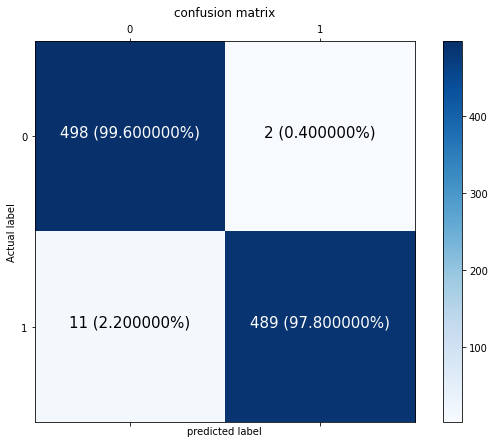

In [ ]:
figsize=(10,7)

#create confusion matrix
cm =confusion_matrix(y,tf.round(modelCirc2.predict(X)))

cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]

n_classes=cm.shape[0]

fig,ax =plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False
#create classes
if classes:
  labels=classes

else:
  labels=np.arange(cm.shape[0])


ax.set(title="confusion matrix",xlabel="predicted label",ylabel="Actual label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)


threshold=(cm.max()+cm.min())/2

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold  else "black",
           size=15
  )

**Multi-class classification**

WHen you have more than two classes as an option it is known as `multi-class classification`



In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist





In [ ]:
#data is already been sorted in train and test

(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape,test_data.shape,train_label.shape,test_label.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
#show the first training example
train_data[0].shape

(28, 28)

In [ ]:
train_label[0]

9

In [ ]:
import numpy as np
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
type(train_data[0])

numpy.ndarray

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt

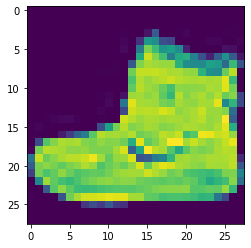

In [ ]:
plt.imshow(train_data[0])

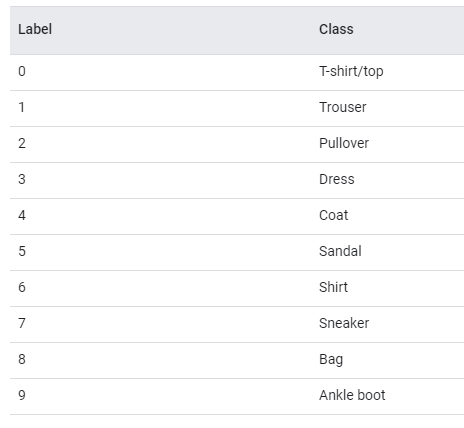

In [ ]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandle","Shirt","Sneaker","Bag","Ankle boot"]

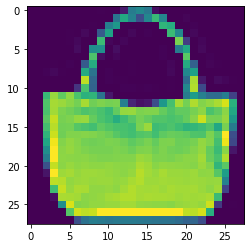

In [ ]:
plt.imshow(train_data[100])

In [ ]:
class_names[train_label[100]]

'Bag'

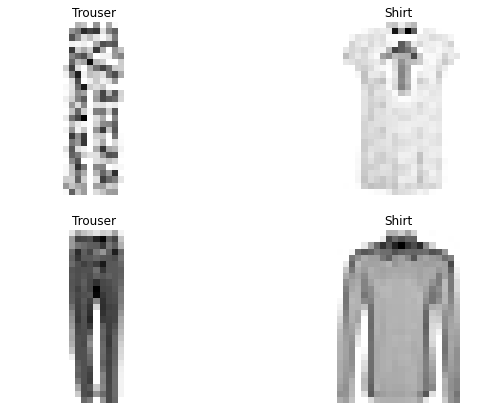

In [ ]:
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis(False)

* If your labels are not one hot encoded use `sparse_categorical_crossentropy` as loss function.

* If labels are one hot encoded use `categorical_crossentropy`

In [ ]:
#set random seed
tf.random.set_seed(42)

callback=tf.keras.callbacks.EarlyStopping(patience=2,monitor="loss")
#lr_scheduler=tf.keras.callbacks.LearningRateScheduler()

#create model
fashionModel1=tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(64,activation="relu"),
                                   tf.keras.layers.Dense(16,activation="relu"),
                                   tf.keras.layers.Dense(10,activation="softmax")
])

#compile model
fashionModel1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
#fit model

history1=fashionModel1.fit(train_data,train_label,epochs=500,verbose=0,callbacks=[callback])

#evaluate model
fashionModel1.evaluate(test_data,test_label)
#visualize

313/313 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.8392


[0.4907636344432831, 0.8392000198364258]

In [ ]:
fashionModel1.evaluate(train_data,train_label)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8709


[0.35399824380874634, 0.8709333539009094]

In [ ]:
fashionModel1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

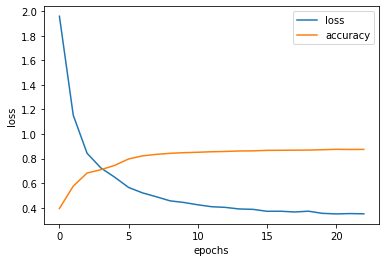

In [ ]:
import pandas as pd
pd.DataFrame(history1.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
train_data.min(),train_data.max()

(0, 255)

**Model 2**

In [ ]:
import tensorflow as tf


Neural networks prefer data to be scaled (or normalized) this means they like to have numbers between 0 and 1.




In [ ]:
#we can get values betwwn 0 1nd 1 by deviding max() of training data 
norm_train_data=train_data/255.0
norm_test_data=test_data/255.0

In [ ]:
norm_test_data.min(),norm_test_data.max()

(0.0, 1.0)

In [ ]:
#set random seed
tf.random.set_seed(42)

#create callback early stopping
callback=tf.keras.callbacks.EarlyStopping(patience=2,monitor="loss")

#create model
fashionModel2=tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(64,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

    ]
)

#compile model
fashionModel2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

#fit model
history2=fashionModel2.fit(norm_train_data,train_label,verbose=0,epochs=100,callbacks=[callback])

#evaluate on test data
fashionModel2.evaluate(norm_test_data,test_label)


313/313 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8836


[0.45092982053756714, 0.8835999965667725]

In [ ]:
fashionModel2.evaluate(norm_train_data,train_label)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1311 - accuracy: 0.9519


[0.13106895983219147, 0.9519333243370056]

Text(0, 0.5, 'loss')

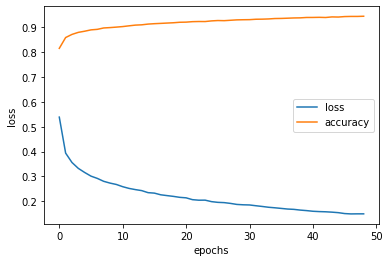

In [ ]:
pd.DataFrame(history2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

**Finding the ideal learnig rate**

In [ ]:
#set random seed
tf.random.set_seed(42)

#create callbacks
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#create model
fashionModel3=tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(64,activation=tf.keras.activations.relu),
                                   tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
                                   tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

#compile the model
fashionModel3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])


#fit the model
history3=fashionModel3.fit(norm_train_data,train_label,epochs=40,verbose=0,callbacks=[lr_scheduler])

In [ ]:
fashionModel3.evaluate(norm_test_data,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 1.7574 - accuracy: 0.2010


[1.7574282884597778, 0.20100000500679016]

In [ ]:
fashionModel3.evaluate(norm_train_data,train_label)

1875/1875 [==============================] - 3s 2ms/step - loss: 1.7586 - accuracy: 0.2004


[1.7585612535476685, 0.20035000145435333]

Text(0, 0.5, 'loss')

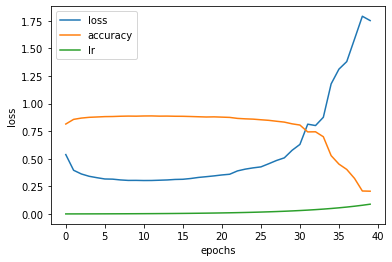

In [ ]:
pd.DataFrame(history3.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt

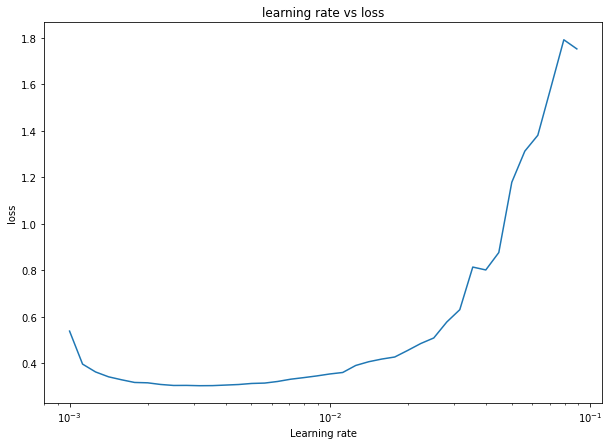

In [ ]:
lrs=1e-3*10**(np.arange(40)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")
plt.show()

**Note** 
*If your model is trained on `normalized train data` you have to make predictions on `normalized test data`.*

In [ ]:
y_probs=fashionModel2.predict(norm_test_data)

In [ ]:
y_probs[0]

array([5.9892500e-14, 1.0597258e-13, 1.9843241e-16, 1.2571640e-07,
       8.2155833e-14, 1.8581156e-08, 4.0996460e-12, 7.7613288e-07,
       3.0567098e-15, 9.9999905e-01], dtype=float32)

In [ ]:
y_probs[1]

array([2.74842341e-06, 1.37742835e-17, 9.90703464e-01, 3.70577735e-11,
       9.26097948e-03, 4.32966111e-25, 3.28435599e-05, 1.04920985e-29,
       1.50851009e-17, 3.06470966e-20], dtype=float32)

In [ ]:
np.sum(y_probs[100],axis=0)

0.99999994

In [ ]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
y_probs[0][9]

0.99999905

In [ ]:
#convert all probability predictions into integers
y_preds=tf.argmax(fashionModel2.predict(norm_test_data),axis=1)
y_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([9, 2, 1, 1, 6])>

In [ ]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
#create confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_label,y_pred=y_preds)

array([[814,   5,  20,  22,   5,   4, 121,   0,   9,   0],
       [  1, 978,   2,  13,   3,   0,   1,   0,   2,   0],
       [ 19,   2, 809,  10,  89,   0,  69,   0,   2,   0],
       [ 16,  19,  15, 887,  26,   1,  31,   0,   4,   1],
       [  1,   1,  89,  30, 798,   0,  78,   0,   3,   0],
       [  0,   0,   0,   0,   1, 955,   0,  17,   5,  22],
       [107,   1,  79,  25,  57,   0, 720,   0,  11,   0],
       [  0,   0,   0,   0,   0,  22,   0, 952,   1,  25],
       [  6,   0,   3,   7,   2,   4,   6,   4, 967,   1],
       [  0,   0,   0,   0,   0,  11,   1,  32,   0, 956]])

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

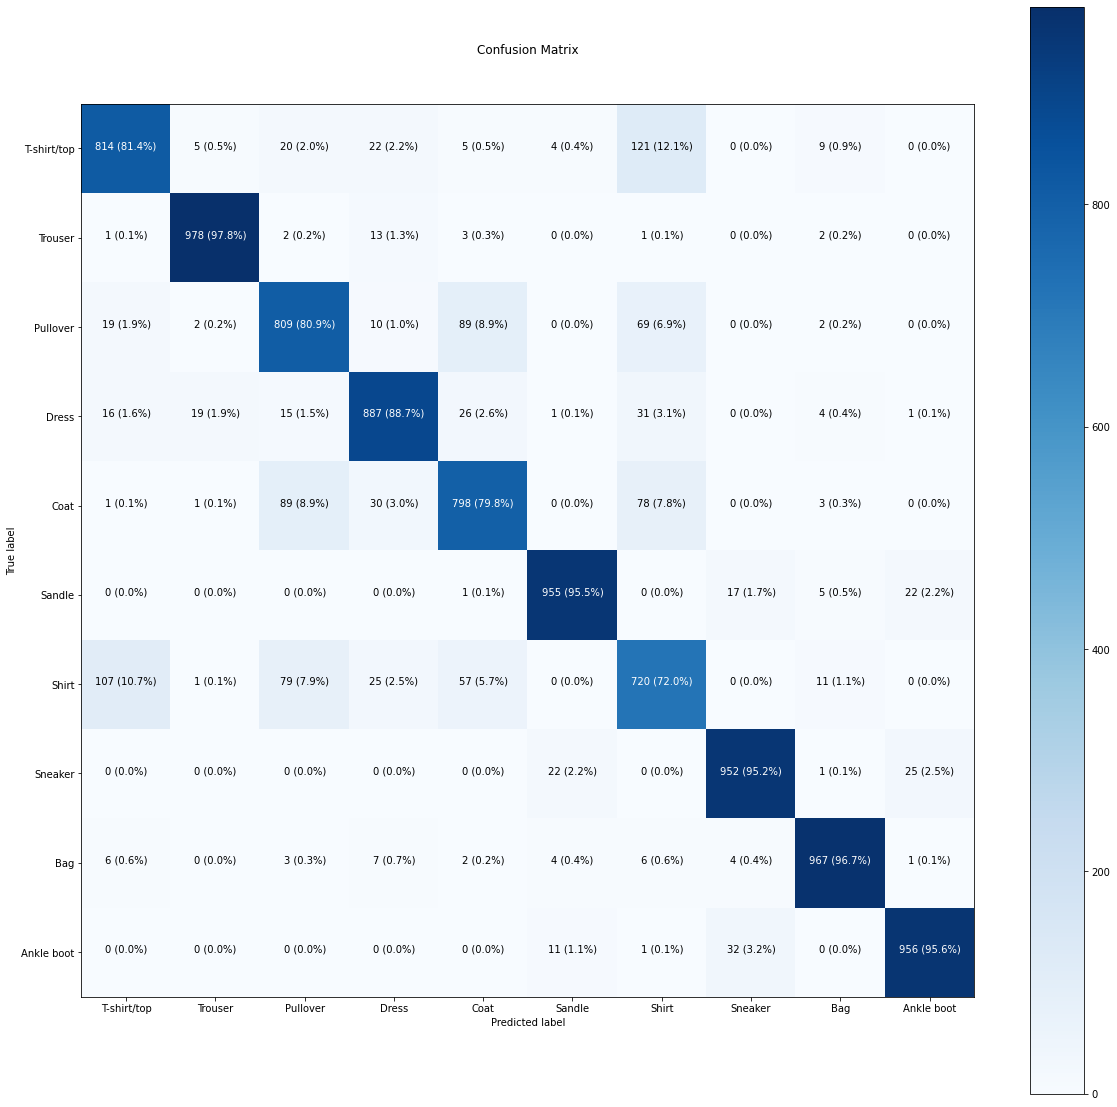

In [ ]:
#Make prettier confusion matrix
make_confusion_matrix(y_true=test_label,y_pred=y_preds,classes=class_names,figsize=(20,20),text_size=10)

In [ ]:
tf.argmax(fashionModel2.predict(norm_test_data[99].reshape(1,28,28)),axis=1).numpy()

array([2])

In [ ]:
test_label[99]

2

**What patterns is our model learning?**

In [ ]:
fashionModel2.layers

In [ ]:
#extract 1st layer
fashionModel2.layers[1]

In [ ]:
#get patterns/weights and biases

weights,biases=fashionModel2.layers[1].get_weights()

In [ ]:
#see shapes
weights.shape, biases.shape

((784, 64), (64,))

Every neuron has bias vector.Each of these is paired with a weight matrix.
Bias vector get initialized as zeros.(Dense layer).
The bias vector dictates how much the patterns withing corresponding weight matrix should influence next layer


Every data point has weight matrix associated with it